# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
display(cities)

['vaini',
 'bluff',
 'east london',
 'port hardy',
 'carnarvon',
 'sal rei',
 'castleblayney',
 'olafsvik',
 'fukue',
 'rio grande',
 'ushuaia',
 'arraial do cabo',
 'new norfolk',
 'grand river south east',
 'nanortalik',
 'thompson',
 'buraydah',
 'severo-kurilsk',
 'opuwo',
 'albany',
 'kavaratti',
 'bonito',
 'puerto ayora',
 'nanakuli',
 'seljord',
 'paragominas',
 'saskylakh',
 'mataura',
 'taolanaro',
 'srednekolymsk',
 'flinders',
 'cherskiy',
 'beringovskiy',
 'cidreira',
 'hobart',
 'ribeira grande',
 'horta',
 'kapaa',
 'tuktoyaktuk',
 'punta arenas',
 'gantt',
 'west hartford',
 'yellowknife',
 'rikitea',
 'hilo',
 'bambous virieux',
 'chuy',
 'berlevag',
 'georgetown',
 'port alfred',
 'dakar',
 'gorno-chuyskiy',
 'cabo san lucas',
 'dikson',
 'vila velha',
 'airai',
 'yulara',
 'itoman',
 'mar del plata',
 'tasiilaq',
 'klaksvik',
 'ingham',
 'kokstad',
 'penha',
 'scarborough',
 'tabiauea',
 'vila franca do campo',
 'grindavik',
 'adeje',
 'amderma',
 'mantua',
 'atuona'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city_data = pd.DataFrame()

for i in cities:
    city_name = i
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
    response = requests.get(url).json()
    #print(json.dumps(response, indent=4, sort_keys=True))
    try:
        weather = [[response['id'],
                    response['name'],
                    response['coord']['lat'], 
                    response['coord']['lon'], 
                    response['main']['temp'] - 273.15, 
                    response['main']['humidity'], 
                    response['clouds']['all'], 
                    response['wind']['speed']]]
        display(weather)
        city_data = city_data.append(weather)

    
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

#end for
city_data.columns = ['City ID', 'City Name', 'Latitude', 'Longitude', 'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data = city_data.reset_index(drop = True)






[[4032243, 'Vaini', -21.2, -175.2, 25.640000000000043, 85, 76, 5.33]]

[[2206939, 'Bluff', -46.6, 168.3333, 9.890000000000043, 90, 100, 10.09]]

[[1006984, 'East London', -33.0153, 27.9116, 14.439999999999998, 82, 67, 5.93]]

[[6111862, 'Port Hardy', 50.6996, -127.4199, 11.430000000000007, 77, 99, 2.62]]

[[2074865, 'Carnarvon', -24.8667, 113.6333, 22.04000000000002, 68, 40, 6.17]]

[[3374235, 'Sal Rei', 16.1833, -22.9167, 21.310000000000002, 82, 86, 7.58]]

[[2965649, 'Castleblayney', 54.1167, -6.7333, 9.340000000000032, 93, 25, 1.42]]

[[3414079, 'Olafsvik', 64.8945, -23.7142, 7.770000000000039, 95, 100, 10.89]]

[[1863997, 'Fukuechō', 32.6881, 128.8419, 25.200000000000045, 44, 0, 3.09]]

[[3451138, 'Rio Grande', -32.035, -52.0986, 4.970000000000027, 73, 1, 5.62]]

[[3833367, 'Ushuaia', -54.8, -68.3, -4.7099999999999795, 96, 96, 1.68]]

[[3471451,
  'Arraial do Cabo',
  -22.9661,
  -42.0278,
  23.930000000000007,
  84,
  45,
  1.94]]

[[2155415, 'New Norfolk', -42.7826, 147.0587, 12.0, 51, 3, 0.87]]

Missing field/result... skipping.


[[3421765, 'Nanortalik', 60.1432, -45.2371, 1.4800000000000182, 99, 100, 3.4]]

[[6165406, 'Thompson', 55.7435, -97.8558, 6.090000000000032, 93, 90, 5.66]]

[[107304, 'Buraidah', 26.326, 43.975, 35.26000000000005, 10, 0, 2.13]]

[[2121385,
  "Severo-Kuril'sk",
  50.6789,
  156.125,
  5.260000000000048,
  90,
  100,
  4.86]]

[[3354077, 'Opuwo', -18.0607, 13.84, 13.140000000000043, 35, 3, 2.32]]

[[5106841, 'Albany', 42.6001, -73.9662, 7.670000000000016, 84, 100, 0.17]]

[[1267390, 'Kavaratti', 10.5669, 72.642, 28.629999999999995, 75, 100, 8.17]]

[[3469294, 'Bonito', -21.1211, -56.4819, 22.920000000000016, 65, 100, 0.67]]

[[3652764, 'Puerto Ayora', -0.7393, -90.3518, 23.08000000000004, 89, 26, 1.79]]

[[5851349, 'Nānākuli', 21.3906, -158.1547, 25.680000000000007, 69, 1, 1.94]]

[[3139894, 'Seljord', 59.4894, 8.634, 18.150000000000034, 56, 6, 1.01]]

[[3393106, 'Paragominas', -2.9667, -47.4833, 22.53000000000003, 89, 60, 0.93]]

[[2017155, 'Saskylakh', 71.9167, 114.0833, 5.03000000000003, 82, 38, 3.94]]

[[6201424, 'Mataura', -46.1927, 168.8643, 9.710000000000036, 97, 100, 2.67]]

Missing field/result... skipping.


[[2121025, 'Srednekolymsk', 67.45, 153.6833, 17.939999999999998, 26, 35, 5.67]]

[[6255012, 'Flinders', -34.5833, 150.8552, 16.730000000000018, 61, 85, 2.24]]

[[2126199, 'Cherskiy', 68.75, 161.3, 16.57000000000005, 31, 83, 4.4]]

[[2126710, 'Beringovskiy', 63.05, 179.3167, 1.7000000000000455, 78, 11, 3.65]]

[[3466165, 'Cidreira', -30.1811, -50.2056, 12.150000000000034, 70, 11, 4.3]]

[[2163355, 'Hobart', -42.8794, 147.3294, 12.450000000000045, 66, 75, 0.45]]

[[3372707,
  'Ribeira Grande',
  38.5167,
  -28.7,
  17.760000000000048,
  77,
  100,
  2.66]]

[[3372988, 'Horta', 38.5333, -28.6333, 17.230000000000018, 78, 100, 2.78]]

[[5848280, 'Kapaa', 22.0752, -159.319, 25.200000000000045, 70, 90, 2.71]]

[[6170031,
  'Tuktoyaktuk',
  69.4541,
  -133.0374,
  -0.3100000000000023,
  86,
  42,
  2.72]]

[[3874787,
  'Punta Arenas',
  -53.15,
  -70.9167,
  0.060000000000002274,
  74,
  40,
  5.3]]

[[4579484, 'Gantt', 34.8001, -82.4243, 16.860000000000014, 73, 90, 4.12]]

[[4845411, 'West Hartford', 41.762, -72.742, 7.900000000000034, 84, 90, 0.45]]

[[6185377, 'Yellowknife', 62.456, -114.3525, 7.400000000000034, 52, 72, 2.24]]

[[4030556, 'Rikitea', -23.1203, -134.9692, 24.57000000000005, 86, 100, 11.47]]

[[5855927, 'Hilo', 19.7297, -155.09, 23.430000000000007, 88, 75, 3.6]]

[[1106677,
  'Bambous Virieux',
  -20.3428,
  57.7575,
  25.680000000000007,
  75,
  42,
  4.1]]

[[3443061, 'Chui', -33.6971, -53.4616, 5.310000000000002, 68, 48, 4.27]]

[[780687, 'Berlevåg', 70.8578, 29.0864, 4.980000000000018, 87, 100, 12.55]]

[[1735106, 'George Town', 5.4112, 100.3354, 31.960000000000036, 70, 20, 2.06]]

[[964432, 'Port Alfred', -33.5906, 26.891, 14.200000000000045, 79, 86, 4.51]]

[[2253354, 'Dakar', 14.6937, -17.4441, 20.49000000000001, 86, 24, 5.34]]

Missing field/result... skipping.


[[3985710,
  'Cabo San Lucas',
  22.8909,
  -109.9124,
  26.400000000000034,
  64,
  75,
  7.69]]

[[1507390, 'Dikson', 73.5069, 80.5464, -1.2199999999999704, 82, 81, 2.89]]

[[3445026, 'Vila Velha', -20.3297, -40.2925, 23.620000000000005, 91, 0, 1.34]]

[[1651810, 'Airai', -8.9266, 125.4092, 22.430000000000007, 57, 92, 1.02]]

[[6355222, 'Yulara', -25.2406, 130.9889, 19.910000000000025, 28, 87, 4.63]]

[[1861280, 'Itoman', 26.1247, 127.6694, 23.010000000000048, 94, 75, 4.12]]

[[3430863,
  'Mar del Plata',
  -38.0023,
  -57.5575,
  6.730000000000018,
  61,
  12,
  5.36]]

[[3424607, 'Tasiilaq', 65.6145, -37.6368, 3.090000000000032, 98, 100, 8.31]]

[[2618795, 'Klaksvík', 62.2266, -6.589, 7.510000000000048, 85, 95, 5.59]]

[[4997130, 'Ingham', 42.6, -84.3833, 5.430000000000007, 72, 1, 0]]

[[988356, 'Kokstad', -30.5472, 29.4241, 3.170000000000016, 81, 0, 1.84]]

[[3454213, 'Penha', -26.7694, -48.6458, 17.210000000000036, 93, 51, 2.95]]

[[2638419, 'Scarborough', 54.2797, -0.4044, 7.240000000000009, 91, 4, 0.9]]

Missing field/result... skipping.


[[3372472,
  'Vila Franca do Campo',
  37.7167,
  -25.4333,
  16.230000000000018,
  86,
  43,
  2.9]]

[[3416888, 'Grindavik', 63.8424, -22.4338, 8.430000000000007, 100, 90, 12.89]]

[[2522437, 'Adeje', 28.1227, -16.726, 16.58000000000004, 70, 20, 1.79]]

Missing field/result... skipping.


[[3174050,
  'Province of Mantua',
  45.1667,
  10.7833,
  15.950000000000045,
  75,
  91,
  1.34]]

[[4020109, 'Atuona', -9.8, -139.0333, 26.29000000000002, 70, 34, 3.78]]

[[191675, 'Kipini', -2.5257, 40.5262, 26.650000000000034, 74, 9, 6.73]]

[[2399001, 'Mayumba', -3.432, 10.6554, 24.670000000000016, 91, 99, 3.14]]

[[2264557, 'Ponta do Sol', 32.6667, -17.1, 19.180000000000007, 75, 61, 2.86]]

[[1249931, 'Beruwala', 6.4788, 79.9828, 28.58000000000004, 80, 51, 6.3]]

[[3444201,
  'Puerto Quijarro',
  -17.7833,
  -57.7667,
  23.52000000000004,
  56,
  99,
  0.66]]

[[934322, 'Mahébourg', -20.4081, 57.7, 25.700000000000045, 76, 28, 4.14]]

[[2075265, 'Busselton', -33.65, 115.3333, 14.470000000000027, 75, 71, 8.83]]

[[6160603,
  'Swift Current',
  50.2834,
  -107.8014,
  10.450000000000045,
  53,
  40,
  2.57]]

[[3366880, 'Hermanus', -34.4187, 19.2345, 8.220000000000027, 80, 93, 1.92]]

[[3831208, 'Qaanaaq', 77.484, -69.3632, -1.9899999999999523, 91, 98, 1.19]]

[[1337613, 'Kulhudhuffushi', 6.6221, 73.07, 28.49000000000001, 70, 62, 8.83]]

[[3393692, 'Itarema', -2.9248, -39.9167, 24.189999999999998, 89, 15, 4.29]]

[[924572, 'Nsanje', -16.92, 35.262, 18.08000000000004, 50, 0, 0.33]]

[[3839307, 'Rawson', -43.3002, -65.1023, 5.220000000000027, 51, 0, 3.97]]

[[6078372,
  'Moose Factory',
  51.2585,
  -80.6094,
  11.990000000000009,
  35,
  1,
  5.66]]

[[986717, 'Kruisfontein', -34.0033, 24.7314, 11.600000000000023, 89, 77, 1.31]]

Missing field/result... skipping.


[[2294915, 'Takoradze', 4.8845, -1.7554, 26.58000000000004, 84, 65, 3.11]]

[[2110227, 'Butaritari', 3.0707, 172.7902, 28.439999999999998, 78, 91, 6.89]]

[[2013727, 'Vanavara', 60.34, 102.2797, 5.390000000000043, 63, 97, 3.09]]

[[2178753, 'Kirakira', -10.4544, 161.9205, 26.189999999999998, 88, 99, 4.17]]

[[2939658, 'Cuxhaven', 53.8718, 8.6909, 8.480000000000018, 93, 90, 2.09]]

[[1000543, 'Graaff-Reinet', -32.2522, 24.5308, 6.689999999999998, 86, 25, 0.8]]

[[1635882, 'Mataram', -8.5833, 116.1167, 32.450000000000045, 63, 19, 3.09]]

[[863061, 'Usinsk', 65.9939, 57.5281, 5.360000000000014, 47, 23, 8.28]]

[[556268, 'Ostrovnoy', 68.0531, 39.5131, 3.7100000000000364, 71, 82, 6.61]]

[[964420,
  'Port Elizabeth',
  -33.918,
  25.5701,
  12.830000000000041,
  77,
  89,
  2.71]]

[[5563839, 'Fortuna', 40.5982, -124.1573, 10.950000000000045, 56, 90, 0.89]]

[[3893726,
  'Constitución',
  -35.3333,
  -72.4167,
  9.700000000000045,
  78,
  78,
  3.04]]

[[5392593, 'San Ramon', 37.7799, -121.978, 11.080000000000041, 85, 1, 0.89]]

[[2171099, 'Codrington', -38.2667, 141.9667, 14.960000000000036, 46, 23, 2.37]]

Missing field/result... skipping.


[[5583997, 'Ammon', 43.4696, -111.9666, 10.840000000000032, 58, 1, 1.54]]

[[292968, 'Abu Dhabi', 24.4667, 54.3667, 34.01000000000005, 55, 0, 4.62]]

Missing field/result... skipping.


[[6089245,
  'Norman Wells',
  65.282,
  -126.8329,
  3.2000000000000455,
  78,
  99,
  1.53]]

[[3430708, 'Mercedes', -34.6515, -59.4307, 4.6299999999999955, 70, 86, 3.25]]

Missing field/result... skipping.


[[3369157, 'Cape Town', -33.9258, 18.4232, 10.379999999999995, 91, 0, 2.26]]

[[4409896, 'Springfield', 37.2153, -93.2982, 8.580000000000041, 92, 1, 1.34]]

[[2013918, 'Ust-Maya', 60.4167, 134.5333, 18.439999999999998, 43, 100, 4.66]]

[[1649150, 'Bengkulu', -3.8004, 102.2655, 28.890000000000043, 67, 99, 2.11]]

Missing field/result... skipping.


[[699328, 'Novopokrovka', 49.8425, 36.5477, 17.210000000000036, 93, 98, 3.83]]

[[93709, 'Mandalī', 33.7499, 45.5541, 35.75, 10, 0, 1.17]]

[[2112802, 'Hasaki', 35.7333, 140.8333, 23.220000000000027, 68, 100, 7.85]]

[[1154689, 'Ko Samui', 9.5357, 99.9357, 31.950000000000045, 70, 20, 0.77]]

[[6137462,
  'Saint-Augustin',
  51.226,
  -58.6502,
  6.4500000000000455,
  65,
  12,
  1.86]]

Missing field/result... skipping.


[[1855342, 'Nishihara', 26.1842, 127.7558, 22.600000000000023, 94, 75, 5.74]]

[[6145890, 'Shelburne', 44.0787, -80.2041, 3.9500000000000455, 61, 0, 0.79]]

[[535113, 'Lipin Bor', 60.2622, 37.9763, 5.5, 53, 9, 4.41]]

[[1263694, 'Manjeri', 11.1167, 76.1167, 31.379999999999995, 62, 40, 1.54]]

[[5866583,
  'Saint Paul Harbor',
  57.79,
  -152.4072,
  7.1299999999999955,
  98,
  100,
  1.27]]

[[5880054, 'Barrow', 71.2906, -156.7887, -1.9899999999999523, 93, 90, 4.12]]

[[2458624, 'Diré', 12.2833, -10.9667, 29.720000000000027, 48, 73, 0.89]]

[[234092, 'Busembatia', 0.7697, 33.6131, 19.879999999999995, 86, 94, 1.68]]

[[2192362,
  'Christchurch',
  -43.5333,
  172.6333,
  11.420000000000016,
  97,
  90,
  1.34]]

[[212902, 'Kindu', -2.95, 25.95, 20.850000000000023, 95, 88, 0.98]]

[[3374210, 'São Filipe', 14.8961, -24.4956, 22.360000000000014, 79, 95, 5.31]]

[[609919, 'Quryq', 43.2, 51.65, 26.0, 42, 21, 1.51]]

[[2514651,
  'Los Llanos de Aridane',
  28.6585,
  -17.9182,
  15.620000000000005,
  81,
  90,
  7.13]]

[[5954718, 'Flin Flon', 54.7682, -101.865, 4.910000000000025, 85, 100, 4.94]]

[[4231997, 'Avera', 33.194, -82.5271, 17.53000000000003, 70, 45, 3.62]]

[[704422, "Krasnoarmiys'k", 48.282, 37.1758, 17.840000000000032, 86, 77, 3.76]]

[[3137469, 'Sørland', 67.667, 12.6934, 7.260000000000048, 79, 100, 6.23]]

[[6324729, 'Halifax', 44.6453, -63.5724, 5.350000000000023, 90, 100, 2.24]]

[[3351663, 'Benguela', -12.5763, 13.4055, 22.480000000000018, 57, 0, 2.36]]

[[1812256, 'Dongsheng', 39.8161, 109.9776, 23.680000000000007, 13, 4, 1.85]]

[[2109528, 'Buala', -8.145, 159.5921, 27.140000000000043, 83, 76, 2.29]]

Missing field/result... skipping.
Missing field/result... skipping.


[[2294877, 'Tamale', 9.4008, -0.8393, 26.810000000000002, 68, 42, 2.52]]

[[1512019, 'Aksarka', 66.5606, 67.7975, 7.1200000000000045, 57, 87, 5]]

[[1623197, 'Tual', -5.6667, 132.75, 27.620000000000005, 78, 94, 9.28]]

[[3175096, 'Laas', 46.6166, 10.7002, 6.930000000000007, 81, 18, 1.92]]

[[1260129, 'Patharia', 23.9, 79.2, 38.410000000000025, 26, 18, 4.02]]

[[2022572, 'Khatanga', 71.9667, 102.5, 11.129999999999995, 71, 42, 3.55]]

[[4034551, 'Faanui', -16.4833, -151.75, 26.960000000000036, 73, 55, 4.85]]

[[3980149, 'Villamar', 20.0167, -102.6, 22.53000000000003, 45, 100, 2.02]]

[[3899695, 'Ancud', -41.8697, -73.8203, 10.82000000000005, 92, 100, 4.72]]

[[5959803, 'Capreol', 46.706, -80.9225, 7.260000000000048, 53, 1, 1.48]]

[[2242885, 'Camabatela', -8.1881, 15.375, 15.950000000000045, 59, 52, 1.79]]

[[5517061, 'Big Spring', 32.2504, -101.4787, 20.340000000000032, 80, 1, 1.79]]

[[3105522, 'Bereda', 43.2686, -7.5406, 10.060000000000002, 100, 95, 1.74]]

[[2123814,
  'Leningradskiy',
  69.3833,
  178.4167,
  3.2100000000000364,
  97,
  71,
  2.7]]

[[1511709, 'Alzamay', 55.5562, 98.6644, 6.270000000000039, 51, 98, 4.54]]

[[6096551, 'Pangnirtung', 66.1451, -65.7125, -7.939999999999998, 88, 10, 2.45]]

[[4164601, 'Miramar', 25.9873, -80.2323, 25.850000000000023, 78, 75, 1.54]]

[[121801, 'Urmia', 37.5527, 45.0761, 24.75, 18, 0, 2.34]]

[[6167817, 'Torbay', 47.6666, -52.7314, 4.920000000000016, 84, 100, 1.34]]

Missing field/result... skipping.


[[4035715, 'Avarua', -21.2078, -159.775, 22.03000000000003, 73, 20, 1.03]]

[[3466980, 'Caravelas', -17.7125, -39.2481, 22.77000000000004, 93, 8, 2.46]]

[[3361934, 'Saldanha', -33.0117, 17.9442, 13.410000000000025, 83, 0, 1.64]]

[[2185763, 'Okato', -39.2, 173.8833, 10.939999999999998, 75, 30, 3.25]]

[[1835848, 'Seoul', 37.5683, 126.9778, 24.660000000000025, 41, 0, 1.27]]

[[1490256, 'Talnakh', 69.4865, 88.3972, 0.1400000000000432, 100, 79, 4.53]]

[[2629833, 'Husavik', 66.0449, -17.3389, 9.950000000000045, 57, 100, 5.12]]

[[935214, 'Saint-Pierre', -21.3393, 55.4781, 23.860000000000014, 51, 0, 2.06]]

[[2071860, 'Esperance', -33.8667, 121.9, 19.010000000000048, 54, 0, 8.07]]

[[1812805, 'Dinghaicun', 26.2847, 119.7936, 21.510000000000048, 94, 99, 3.96]]

[[3164387, 'Vieste', 41.8825, 16.175, 16.420000000000016, 84, 100, 6.07]]

[[3448903,
  'São João da Barra',
  -21.6403,
  -41.0511,
  23.439999999999998,
  80,
  76,
  2.43]]

[[5955902,
  'Fort Nelson',
  58.8053,
  -122.7002,
  12.450000000000045,
  49,
  52,
  0.44]]

[[258175, 'Lixouri', 38.2019, 20.4314, 16.920000000000016, 73, 47, 2.82]]

[[2620279, 'Hirtshals', 57.5881, 9.9592, 10.900000000000034, 74, 44, 2.54]]

[[3423146, 'Ilulissat', 69.2167, -51.1, 8.010000000000048, 31, 48, 7.72]]

[[2647984, 'Great Yarmouth', 52.6083, 1.7305, 9.210000000000036, 89, 5, 3.86]]

[[3832899, 'Viedma', -40.8135, -62.9967, 5.990000000000009, 56, 11, 3.32]]

[[2553604, 'Casablanca', 33.5928, -7.6192, 18.75, 87, 91, 0.7]]

Missing field/result... skipping.


[[5993072, 'Kitimat', 54.0524, -128.6534, 13.28000000000003, 68, 100, 1.44]]

[[1015776, 'Bredasdorp', -34.5322, 20.0403, 7.930000000000007, 92, 88, 1.55]]

[[108410, 'Riyadh', 24.6877, 46.7219, 37.03000000000003, 8, 0, 2.57]]

Missing field/result... skipping.


[[964406, 'Port Shepstone', -30.7414, 30.455, 16.400000000000034, 61, 0, 9.1]]

[[4031574, 'Provideniya', 64.3833, -173.3, 8.020000000000039, 43, 3, 2.23]]

[[141665, 'Bandar-e Lengeh', 26.5579, 54.8807, 32.06, 79, 20, 4.12]]

[[3466196,
  'Chopinzinho',
  -25.8558,
  -52.5233,
  12.480000000000018,
  96,
  19,
  1.02]]

[[3835869, 'Santiago del Estero', -27.7951, -64.2615, 12.25, 44, 9, 2.38]]

[[5919850, 'Chapais', 49.7834, -74.8492, 2.75, 53, 0, 1.59]]

[[2729907, 'Longyearbyen', 78.2186, 15.6401, 0.910000000000025, 69, 75, 1.54]]

[[3418910, 'Upernavik', 72.7868, -56.1549, -0.6999999999999886, 95, 100, 7.14]]

[[1811720, 'Enshi', 30.3, 109.4833, 28.55000000000001, 57, 100, 1.05]]

[[5887531, 'Ashcroft', 50.7165, -121.2859, 18.160000000000025, 51, 33, 1.75]]

[[6180550, 'Whitehorse', 60.7161, -135.0538, 8.180000000000007, 52, 75, 7.15]]

Missing field/result... skipping.


[[5710360, 'Winnemucca', 40.973, -117.7357, 18.03000000000003, 15, 1, 2.15]]

[[1794971, 'Shitanjing', 39.2342, 106.3439, 26.860000000000014, 16, 44, 1.97]]

[[935215, 'Saint-Philippe', -21.3585, 55.7679, 23.700000000000045, 75, 1, 3.2]]

[[1171757, 'Mach', 29.8637, 67.3298, 35.29000000000002, 9, 0, 0.68]]

[[128747, 'Karaj', 35.8355, 51.0103, 28.950000000000045, 11, 0, 2.25]]

[[5391295, 'Salinas', 36.6777, -121.6555, 11.960000000000036, 78, 90, 6.69]]

[[5122534, 'Jamestown', 42.097, -79.2353, 8.100000000000023, 92, 90, 0.45]]

[[6050066, 'La Ronge', 55.1001, -105.2842, 3.160000000000025, 96, 91, 2.86]]

[[3870282, 'Talcahuano', -36.7167, -73.1167, 5.82000000000005, 100, 0, 2.06]]

[[2092164, 'Lorengau', -2.0226, 147.2712, 28.650000000000034, 80, 30, 5.39]]

[[3995236, 'Mulegé', 26.8833, -111.9833, 24.75, 47, 84, 1.01]]

[[1808370, 'Hengyang', 26.8881, 112.615, 27.439999999999998, 72, 95, 1.53]]

[[1215350, 'Bireun', 5.203, 96.7009, 30.370000000000005, 64, 100, 2.89]]

[[546105, 'Nikolskoye', 59.7035, 30.7861, 9.650000000000034, 50, 4, 3.14]]

[[3520994,
  'Puerto Escondido',
  15.85,
  -97.0667,
  28.220000000000027,
  75,
  60,
  1.16]]

[[286621, 'Salalah', 17.0151, 54.0924, 30.05000000000001, 84, 75, 6.17]]

[[3354071, 'Oranjemund', -28.55, 16.4333, 13.430000000000007, 77, 100, 4.43]]

[[3336897, 'La Rioja', 42.25, -2.5, 10.879999999999995, 94, 94, 0.54]]

[[1061412, 'Mananara', -16.1667, 49.7667, 23.75, 76, 33, 0.61]]

[[1292288, 'Thaton', 16.9206, 97.3714, 29.660000000000025, 73, 99, 3.42]]

[[2140558, 'Koumac', -20.5667, 164.2833, 22.04000000000002, 55, 71, 5.58]]

[[1571058, 'Phan Thiet', 10.9333, 108.1, 33.19, 58, 16, 4.85]]

[[3717546, 'Saint-Raphaël', 19.4333, -72.2, 21.840000000000032, 89, 12, 1.45]]

[[3696417, 'Huánuco', -9.9329, -76.2415, 15.970000000000027, 93, 90, 1.31]]

Missing field/result... skipping.
Missing field/result... skipping.


[[3893629, 'Coquimbo', -29.9533, -71.3436, 10.850000000000023, 100, 20, 1.43]]

[[3421719, 'Narsaq', 60.9167, -46.05, 3.1200000000000045, 98, 100, 1.35]]

[[2278158, 'Buchanan', 5.8808, -10.0467, 25.83000000000004, 88, 97, 1.78]]

[[3804949, 'Guasdualito', 7.2424, -70.7324, 24.0, 100, 59, 1.54]]

[[5287565,
  'Bullhead City',
  35.1478,
  -114.5683,
  29.900000000000034,
  15,
  0,
  2.78]]

[[1282256, 'Hithadhoo', -0.6, 73.0833, 28.640000000000043, 71, 62, 7.42]]

[[5983607, 'Inuvik', 68.3499, -133.7218, 2.1899999999999977, 63, 95, 2.62]]

[[1266931, 'Khargāpur', 24.823, 79.144, 37.150000000000034, 31, 1, 2.65]]

Missing field/result... skipping.


[[4036284, 'Alofi', -19.0595, -169.9187, 26.670000000000016, 76, 40, 4.87]]

[[1486321, 'Yar-Sale', 66.8333, 70.8333, 9.129999999999995, 51, 85, 2.58]]

[[2270385, 'Camacha', 33.0833, -16.3333, 16.670000000000016, 82, 75, 5.14]]

[[3662489,
  'Santa Isabel Rio Negro',
  -0.4139,
  -65.0192,
  22.970000000000027,
  97,
  100,
  1.18]]

[[1503037, 'Kodinsk', 58.6881, 99.1844, 4.5400000000000205, 83, 100, 3.31]]

[[2122090, 'Pevek', 69.7008, 170.3133, 5.740000000000009, 55, 1, 1.19]]

[[2094342, 'Kavieng', -2.5744, 150.7967, 29.090000000000032, 74, 93, 5.21]]

[[4033077, 'Vaitape', -16.5167, -151.75, 26.970000000000027, 73, 55, 4.94]]

[[6325479, 'Beaupré', 47.0443, -70.8953, 6.510000000000048, 63, 1, 1.03]]

[[3347019, 'Mossamedes', -15.1961, 12.1522, 22.600000000000023, 57, 34, 2.88]]

[[2180815, 'Tuatapere', -46.1333, 167.6833, 9.900000000000034, 94, 100, 3.98]]

[[2224827, 'Ngaoundéré', 7.3167, 13.5833, 18.420000000000016, 84, 70, 1.4]]

[[2079582, 'Alyangula', -13.8483, 136.4192, 28.930000000000007, 51, 52, 5.15]]

[[3664980, 'Boa Vista', 2.8197, -60.6733, 24.99000000000001, 88, 75, 2.06]]

[[3855065,
  'General Roca',
  -39.0333,
  -67.5833,
  3.2200000000000273,
  60,
  23,
  3.69]]

[[2015306, 'Tiksi', 71.6872, 128.8694, 2.1000000000000227, 85, 14, 3.9]]

[[1819729, 'Hong Kong', 22.2855, 114.1577, 32.22000000000003, 77, 100, 0.45]]

Missing field/result... skipping.


[[1698354, 'Namuac', 18.6109, 121.1657, 32.19, 63, 80, 5.42]]

[[2548885, 'Fes', 34.0372, -4.9998, 20.140000000000043, 77, 0, 2.13]]

[[3134521, 'Tjøme', 59.1109, 10.3933, 14.350000000000023, 58, 86, 1.58]]

[[1650434, 'Bambanglipuro', -7.95, 110.2833, 29.189999999999998, 69, 79, 4.28]]

[[5282297, 'Bethel', 41.3712, -73.414, 7.53000000000003, 85, 90, 0.45]]

[[3386213, 'Touros', -5.1989, -35.4608, 23.5, 86, 44, 5.28]]

[[3608828, 'Iralaya', 15, -83.2333, 26.410000000000025, 76, 36, 3.89]]

[[2094144, 'Kerema', -7.9631, 145.7785, 27.189999999999998, 77, 90, 2.89]]

[[3533462,
  'Acapulco de Juárez',
  16.8634,
  -99.8901,
  27.890000000000043,
  76,
  100,
  0.53]]

[[2126123, 'Chokurdakh', 70.6333, 147.9167, 17.650000000000034, 25, 9, 6.47]]

[[2018069, 'Peleduy', 59.6289, 112.7406, 8.03000000000003, 70, 100, 1.56]]

[[3156868, 'Folldal', 62.1325, 9.9968, 13.480000000000018, 49, 5, 0.56]]

[[2639912, 'Preston', 53.7667, -2.7167, 10.900000000000034, 81, 2, 1.83]]

[[5962442, 'Goderich', 43.7501, -81.7165, 6.9500000000000455, 65, 0, 2.54]]

[[6138802,
  'Saint-Michel-des-Saints',
  46.6834,
  -73.9159,
  2.230000000000018,
  80,
  1,
  0.88]]

[[3421193, 'Paamiut', 61.994, -49.6678, 1.5400000000000205, 94, 99, 3.29]]

[[2172880, 'Byron Bay', -28.65, 153.6167, 17.460000000000036, 71, 100, 8.06]]

[[1684245, 'Tagusao', 9.1924, 117.8141, 29.910000000000025, 69, 79, 3.65]]

Missing field/result... skipping.


[[3370352, 'Atlantis', -33.5667, 18.4834, 9.230000000000018, 88, 3, 1.29]]

[[1642692, 'Jatiroto', -7.8833, 111.1167, 28.74000000000001, 71, 98, 0.78]]

Missing field/result... skipping.


[[3461370, 'Imbituba', -28.24, -48.6703, 17.939999999999998, 83, 66, 5.29]]

Missing field/result... skipping.


[[3714956, 'Ailigandí', 9.2333, -78.0167, 25.24000000000001, 88, 91, 2.44]]

[[4787534, 'Sterling', 39.0062, -77.4286, 9.420000000000016, 95, 90, 0.45]]

[[3717588, 'Saint-Marc', 19.1082, -72.6938, 26.860000000000014, 70, 13, 1.7]]

[[3430443, 'Necochea', -38.5473, -58.7368, 7.189999999999998, 53, 43, 7.69]]

[[2019718, 'Mukhen', 48.1, 136.1, 15.82000000000005, 50, 100, 2.59]]

[[3908339, 'Patacamaya', -17.2333, -67.9167, 6.080000000000041, 82, 100, 2]]

[[5554072, 'Juneau', 58.3019, -134.4197, 9.600000000000023, 85, 75, 1.79]]

[[102527, 'Sakakah', 29.9697, 40.2064, 28.760000000000048, 15, 70, 4.47]]

[[1510689, 'Baykit', 61.67, 96.37, 4.840000000000032, 84, 100, 3.3]]

[[3883457, 'Lebu', -37.6167, -73.65, 9.560000000000002, 74, 55, 1.25]]

[[361058, 'Alexandria', 31.2156, 29.9553, 22.390000000000043, 54, 0, 4.09]]

Missing field/result... skipping.


[[2128975, 'Nemuro', 43.3236, 145.575, 11.240000000000009, 92, 72, 6.4]]

[[1805935, 'Jiazi', 22.8779, 116.067, 31.470000000000027, 70, 100, 9.83]]

[[1489822, "Tegul'det", 57.3064, 88.1667, 13.360000000000014, 29, 18, 2.05]]

[[553766, 'Kamenka', 51.3223, 42.7678, 20.310000000000002, 72, 85, 1.41]]

[[1162738, 'Wah', 33.798, 72.6957, 36.47000000000003, 21, 7, 1.74]]

Missing field/result... skipping.


[[2157698, 'Mildura', -34.2, 142.15, 14.980000000000018, 33, 0, 2.57]]

[[3372964, 'Lagoa', 39.05, -27.9833, 16.939999999999998, 78, 38, 3.32]]

[[2136825, 'Isangel', -19.55, 169.2667, 23.02000000000004, 66, 100, 3.42]]

[[1797793, 'Qingquan', 30.4511, 115.2559, 29.870000000000005, 58, 70, 1.42]]

[[4031742, 'Egvekinot', 66.3167, -179.1667, 6.350000000000023, 45, 8, 2.3]]

[[5924351, 'Clyde River', 70.4692, -68.5914, -8.339999999999975, 87, 5, 1.77]]

[[1150965, 'Ranong', 9.9658, 98.6348, 31.960000000000036, 65, 87, 2.24]]

[[3932145, 'Pisco', -13.7, -76.2167, 18.03000000000003, 94, 90, 2.57]]

[[2025256, 'Chumikan', 54.7183, 135.315, 2.3100000000000023, 91, 100, 4.86]]

[[6316343,
  'Alta Floresta',
  -9.8756,
  -56.0861,
  22.79000000000002,
  64,
  76,
  1.47]]

[[2980080, 'Saint-François', 46.4154, 3.9054, 6.689999999999998, 100, 0, 1.03]]

[[2022083, 'Alekseyevsk', 57.8406, 108.3492, 9.640000000000043, 40, 100, 3.11]]

[[1056899, 'Sambava', -14.2667, 50.1667, 24.600000000000023, 74, 6, 3.4]]

[[3563317, 'Corralillo', 22.9819, -80.5856, 24.200000000000045, 83, 82, 3.41]]

Missing field/result... skipping.


[[2338660, 'Yaan', 7.3833, 8.5667, 25.110000000000014, 82, 100, 2.63]]

[[3421982, 'Maniitsoq', 65.4167, -52.9, 1.9700000000000273, 82, 5, 1.57]]

[[4989133,
  'Charter Township of Clinton',
  42.587,
  -82.9199,
  7.590000000000032,
  62,
  9,
  0.45]]

[[3897774, 'Buin', -33.7333, -70.75, 8.57000000000005, 64, 100, 1.42]]

[[3628473, 'San Cristobal', 7.7669, -72.225, 18.480000000000018, 96, 99, 0.51]]

[[3388456,
  'São José da Coroa Grande',
  -8.8978,
  -35.1478,
  23.670000000000016,
  86,
  52,
  2.42]]

[[2449893, 'Tessalit', 20.1986, 1.0114, 30.660000000000025, 9, 65, 0.48]]

[[2435508, 'Benoy', 8.9833, 16.3199, 26.879999999999995, 53, 86, 2.03]]

[[3393400, 'Pacatuba', -3.9842, -38.6203, 26.650000000000034, 90, 74, 1.5]]

[[5870133, 'Nome', 64.5011, -165.4064, 12.04000000000002, 25, 1, 9.77]]

[[3457595,
  'Martinópolis',
  -22.1458,
  -51.1708,
  21.620000000000005,
  55,
  72,
  2.3]]

[[286245, 'Sur', 22.5667, 59.5289, 35.80000000000001, 32, 99, 5.33]]

Missing field/result... skipping.


[[777019, 'Vardø', 70.3705, 31.1107, 5.420000000000016, 77, 100, 9.29]]

[[327234, 'Tulu Bolo', 8.6667, 38.2167, 17.450000000000045, 48, 25, 1.58]]

[[5847411, 'Kahului', 20.8947, -156.47, 24.74000000000001, 79, 40, 4.12]]

[[1218420, 'Seydi', 39.4816, 62.9137, 37.450000000000045, 11, 0, 2.23]]

[[3466704, 'Castro', -24.7911, -50.0119, 14.620000000000005, 95, 50, 1.47]]

Missing field/result... skipping.


[[4035249, 'Lufilufi', -13.8745, -171.5986, 30.439999999999998, 70, 58, 7.26]]

[[118063, 'Sabzawār', 36.2126, 57.6819, 31.600000000000023, 15, 0, 5.14]]

[[295277, 'Eilat', 29.5581, 34.9482, 28.910000000000025, 24, 0, 5.14]]

[[5915327,
  'Cap-aux-Meules',
  47.3821,
  -61.8597,
  3.0100000000000477,
  93,
  100,
  1.54]]

[[2063056, 'Port Augusta', -32.5, 137.7667, 18.730000000000018, 22, 2, 2.99]]

[[3860443,
  'Comodoro Rivadavia',
  -45.8667,
  -67.5,
  2.920000000000016,
  60,
  0,
  3.6]]

[[2264923, 'Peniche', 39.3558, -9.3811, 14.760000000000048, 91, 24, 5.51]]

[[6853140, 'Lesnoy', 57.6198, 63.0784, 24.939999999999998, 30, 33, 5.56]]

[[1067565, 'Beloha', -25.1667, 45.05, 19.120000000000005, 73, 0, 2.55]]

[[3517970, 'Pochutla', 15.7432, -96.4661, 24.900000000000034, 79, 20, 0.76]]

[[1024312, 'Mocuba', -16.8392, 36.9856, 17.150000000000034, 74, 0, 1.53]]

[[3697838, 'Contamana', -7.3333, -75.0167, 25.600000000000023, 70, 87, 0.22]]

[[2134814, 'Sola', -13.8833, 167.55, 25.430000000000007, 79, 100, 6.76]]

[[2527087,
  'Tiznit Province',
  29.5833,
  -9.5,
  22.100000000000023,
  50,
  100,
  1.21]]

[[2633274, 'Akureyri', 65.6835, -18.0878, 9.960000000000036, 50, 40, 7.2]]

[[4004293, 'Ixtapa', 20.7, -105.2, 25.680000000000007, 79, 95, 0.82]]

Missing field/result... skipping.


[[1528998, 'Yumen', 40.2833, 97.2, 28.99000000000001, 12, 16, 10.89]]

[[1695546, 'Pandan', 14.0453, 124.1694, 30.560000000000002, 67, 71, 0.82]]

[[1052373, 'Beira', -19.8436, 34.8389, 18.05000000000001, 88, 20, 2.54]]

[[3436547, 'Yuty', -26.6, -56.25, 12.640000000000043, 70, 38, 4.01]]

[[3530103,
  'San Miguel de Cozumel',
  20.5083,
  -86.9458,
  26.730000000000018,
  84,
  38,
  3.74]]

[[1708743, 'Kinablangan', 7.6947, 126.5503, 27.0, 77, 100, 0.95]]

[[1268567, 'Kakching', 24.4833, 93.9833, 28.879999999999995, 33, 6, 2.09]]

[[1696188, 'Palauig', 15.435, 119.9045, 30.970000000000027, 68, 76, 3.03]]

[[1735902, 'Sibu', 2.3, 111.8167, 32.170000000000016, 62, 40, 0.38]]

[[3578351,
  'Petites Anses',
  15.8501,
  -61.6442,
  23.730000000000018,
  69,
  4,
  7.78]]

[[2323675, 'Sapele', 5.8941, 5.6767, 24.27000000000004, 96, 94, 1.08]]

[[1524606, 'Derzhavīnsk', 51.1, 66.3167, 27.680000000000007, 27, 64, 5]]

[[2169068, 'Deniliquin', -35.5333, 144.9667, 13.890000000000043, 36, 0, 2.57]]

[[2077895, 'Alice Springs', -23.7, 133.8833, 18.75, 27, 64, 4.21]]

[[5557293, 'Sitka', 57.0531, -135.33, 11.939999999999998, 62, 90, 6.17]]

[[2318044, 'Yola', 9.2, 12.4833, 26.670000000000016, 60, 32, 1.64]]

[[1062663, 'Mahajanga', -15.7167, 46.3167, 27.010000000000048, 61, 20, 2.06]]

[[4315588, 'Baton Rouge', 30.4508, -91.1545, 19.879999999999995, 92, 1, 2.57]]

[[6067472, 'Marystown', 47.1666, -55.1483, 4.260000000000048, 86, 100, 5.54]]

[[2654970, 'Brae', 60.3964, -1.353, 6.9500000000000455, 90, 87, 2.02]]

[[1497899, "Gal'bshtadt", 53.2264, 78.9845, 22.370000000000005, 32, 20, 4.4]]

[[1500125, 'Lyubinskiy', 55.1542, 72.6925, 25.82000000000005, 34, 15, 6.42]]

[[6111867,
  'Port Hawkesbury',
  45.6169,
  -61.3485,
  4.439999999999998,
  95,
  90,
  1.34]]

[[1256705, 'Shāhpura', 27.3833, 75.9667, 33.629999999999995, 24, 75, 5.77]]

[[933995, 'Souillac', -20.5167, 57.5167, 26.210000000000036, 78, 40, 3.56]]

[[7671223, 'Kloulklubed', 7.0419, 134.2556, 28.28000000000003, 81, 100, 9.37]]

[[3572462, 'Dunmore Town', 25.5, -76.65, 25.629999999999995, 78, 1, 5.97]]

[[2738381, 'Lata', 40.1629, -8.3327, 13.879999999999995, 94, 12, 0.9]]

[[1489828, 'Teeli', 51.0333, 90.2333, 14.230000000000018, 26, 5, 1.65]]

[[3443631, 'Bella Union', -30.2752, -57.6007, 6.78000000000003, 76, 0, 2.81]]

[[4845585, 'Westport', 41.1415, -73.3579, 8.379999999999995, 85, 90, 1.34]]

[[3980627,
  'Valle de Allende',
  26.9333,
  -105.4,
  25.54000000000002,
  21,
  44,
  4.57]]

[[2145554, 'Ulladulla', -35.35, 150.4667, 14.370000000000005, 57, 71, 4.35]]

[[1640972, 'Katobu', -4.9408, 122.5276, 30.700000000000045, 58, 97, 1.06]]

Missing field/result... skipping.


[[1280849, 'Kashgar', 39.4547, 75.9797, 29.560000000000002, 16, 20, 4.06]]

[[2027296, 'Aykhal', 66, 111.5, 15.980000000000018, 42, 21, 5.95]]

[[1651531, 'Ambon City', -3.6954, 128.1814, 30.08000000000004, 66, 40, 4.07]]

[[3141310, 'Rørvik', 64.8621, 11.2373, 8.390000000000043, 84, 10, 2.34]]

[[2295684, 'Salaga', 8.5508, -0.5188, 25.960000000000036, 79, 27, 2.67]]

[[2022773, 'Khandyga', 62.6667, 135.6, 16.350000000000023, 59, 100, 4.41]]

[[1842966, 'Gijang', 35.2442, 129.2139, 25.850000000000023, 61, 0, 3.38]]

[[1214026, 'Sabang', 5.8933, 95.3214, 28.78000000000003, 73, 100, 8.68]]

[[3616234, 'Somotillo', 13.0433, -86.9064, 25.450000000000045, 85, 88, 0.7]]

[[1640902, 'Kawalu', -7.3817, 108.2082, 29.810000000000002, 61, 51, 2.02]]

[[4301317, 'Morehead', 37.2711, -87.1764, 11.950000000000045, 92, 90, 0]]

[[2318123, 'Yenagoa', 4.9247, 6.2642, 24.210000000000036, 95, 72, 0.62]]

[[964137, 'Pretoria', -25.7449, 28.1878, 7.060000000000002, 53, 72, 3.26]]

[[3453821, 'Pindorama', -21.1858, -48.9072, 22.03000000000003, 54, 100, 0.92]]

[[296852, 'Erzin', 36.9559, 36.2, 22.230000000000018, 74, 44, 1.24]]

[[1637001, 'Biak', -0.9131, 122.8766, 27.54000000000002, 76, 98, 2.31]]

Missing field/result... skipping.


[[3402648, 'Carutapera', -1.195, -46.02, 24.04000000000002, 92, 18, 2.24]]

[[4760059,
  'Fredericksburg',
  38.3032,
  -77.4605,
  10.29000000000002,
  91,
  90,
  0.45]]

[[2392087, 'Porto-Novo', 6.4965, 2.6036, 26.360000000000014, 85, 36, 2.21]]

[[5861897, 'Fairbanks', 64.8378, -147.7164, 10.850000000000023, 50, 75, 7.2]]

[[5972291,
  'Havre-St-Pierre',
  50.2334,
  -63.5986,
  0.20000000000004547,
  93,
  1,
  1.54]]

[[1712961, 'Gigmoto', 13.7796, 124.39, 29.99000000000001, 74, 75, 2.22]]

[[3407762, 'Amapá', 1, -52, 21.470000000000027, 99, 30, 0.71]]

[[4160795, 'Key Largo', 25.0865, -80.4473, 25.720000000000027, 67, 2, 3.75]]

[[1636308, 'Manokwari', -0.8667, 134.0833, 28.970000000000027, 75, 100, 2.01]]

[[2032614, 'Baruun-Urt', 46.6806, 113.2792, 15.470000000000027, 36, 57, 1.89]]

[[6620339, 'Karratha', -20.7377, 116.8463, 20.24000000000001, 81, 99, 8.06]]

[[5367788, 'Lompoc', 34.6391, -120.4579, 12.120000000000005, 76, 90, 5.14]]

[[2521582, 'Arona', 28.0996, -16.681, 14.28000000000003, 73, 20, 0.89]]

[[4026082,
  'Lázaro Cárdenas',
  17.9583,
  -102.2,
  26.870000000000005,
  73,
  71,
  1.61]]

[[1244926, 'Hambantota', 6.1241, 81.1185, 30.980000000000018, 63, 83, 9.88]]

[[962367, 'Richards Bay', -28.783, 32.0377, 17.80000000000001, 86, 36, 3.7]]

[[3419842, 'Sisimiut', 66.9395, -53.6735, 3.170000000000016, 71, 18, 2.25]]

[[3452483, 'Prado', -17.3411, -39.2208, 22.680000000000007, 92, 36, 3]]

[[6144195, 'Senneterre', 48.3835, -77.2328, 4.1200000000000045, 58, 0, 1.14]]

[[2422442, 'Dabola', 10.75, -11.1167, 23.379999999999995, 83, 80, 1.69]]

[[6690296, 'Saint-Joseph', -21.3667, 55.6167, 23.74000000000001, 70, 0, 3.16]]

[[5546220, 'Saint George', 37.1041, -113.5841, 25.83000000000004, 14, 1, 0.89]]

[[1516589, 'Zhezkazgan', 47.8043, 67.7144, 29.80000000000001, 19, 37, 5.81]]

[[2208248,
  'Kaitangata',
  -46.2817,
  169.8464,
  10.129999999999995,
  98,
  100,
  4.54]]

[[4323873, 'Estelle', 29.8458, -90.1067, 24.110000000000014, 70, 1, 2.57]]

[[5779548, 'Payson', 40.0444, -111.7321, 18.140000000000043, 27, 1, 0.58]]

Missing field/result... skipping.


[[2276492, 'Harper', 4.375, -7.7169, 26.140000000000043, 88, 62, 3.35]]

[[3587498, 'Acajutla', 13.5928, -89.8275, 26.560000000000002, 81, 26, 2.5]]

Missing field/result... skipping.


[[1641977, 'Kalianget', -7.05, 113.9333, 29.420000000000016, 67, 30, 1.55]]

[[2068110, 'Kununurra', -15.7667, 128.7333, 30.99000000000001, 23, 46, 1.54]]

[[2129961, 'Ichinohe', 40.2069, 141.3017, 17.08000000000004, 59, 55, 6.7]]

[[5387494, 'Ridgecrest', 35.6225, -117.6709, 26.950000000000045, 26, 1, 2.24]]

[[3127889, 'Boiro', 42.65, -8.9, 11.580000000000041, 80, 31, 3.74]]

[[6144312, 'Sept-Îles', 50.2001, -66.3821, 3.3000000000000114, 83, 1, 1.03]]

[[2093685, 'Kokopo', -4.352, 152.2633, 28.79000000000002, 72, 77, 5.19]]

[[3379507, 'Bartica', 6.4, -58.6167, 24.180000000000007, 99, 62, 0.72]]

Missing field/result... skipping.


[[2514301, 'Mahon', 39.8885, 4.2658, 16.310000000000002, 77, 0, 2.57]]

[[4552215, 'Stillwater', 36.1156, -97.0584, 12.660000000000025, 86, 1, 4.12]]

[[686090, 'Asău', 46.4333, 26.4, 12.75, 95, 100, 0.72]]

[[53157, 'Qandala', 11.472, 49.8728, 32.670000000000016, 50, 0, 1.19]]

[[1721720, 'Cabatuan', 10.8794, 122.486, 31.310000000000002, 65, 46, 3.24]]

[[2021799,
  'Konstantinovka',
  49.6167,
  127.9833,
  20.05000000000001,
  43,
  60,
  2.33]]

[[4998842, 'Lapeer', 43.0514, -83.3188, 5.770000000000039, 100, 1, 0]]

[[3981391, 'Tomatlán', 19.9333, -105.25, 22.55000000000001, 76, 97, 0.62]]

[[1293960, 'Taunggyi', 20.7833, 97.0333, 22.54000000000002, 67, 100, 0.54]]

Missing field/result... skipping.


[[3871336, 'Santiago', -33.4569, -70.6483, 11.230000000000018, 68, 20, 0.79]]

[[2194098, 'Ahipara', -35.1667, 173.1667, 13.490000000000009, 73, 79, 6.9]]

[[368246, 'Raja', 8.4596, 25.678, 24.710000000000036, 62, 9, 2.27]]

[[3464008, 'Esmeraldas', -19.7625, -44.3139, 20.480000000000018, 61, 95, 1.44]]

[[5983720, 'Iqaluit', 63.7506, -68.5145, -4.149999999999977, 22, 90, 2.57]]

[[2446796, 'Bilma', 18.6853, 12.9164, 29.0, 10, 1, 3.65]]

[[5380420, 'Pacifica', 37.6138, -122.4869, 11.439999999999998, 86, 90, 3.58]]

[[1529484, 'Kumul', 42.8, 93.45, 29.75, 12, 96, 3.82]]

[[3674676, 'Mitú', 1.1983, -70.1733, 22.410000000000025, 99, 99, 0.26]]

[[2156643,
  'Mount Gambier',
  -37.8333,
  140.7667,
  13.950000000000045,
  58,
  10,
  2.57]]

[[4033557, 'Tautira', -17.7333, -149.15, 25.010000000000048, 71, 43, 6.19]]

[[343300, 'Asmara', 15.3333, 38.9333, 20.700000000000045, 32, 28, 1.66]]

[[1785036, 'Zhangye', 38.9342, 100.4517, 30.32000000000005, 11, 1, 6.26]]

[[215605, 'Kabare', -2.4683, 28.8242, 16.78000000000003, 94, 84, 0.48]]

[[3440777, 'Rocha', -34.4833, -54.3333, 6.670000000000016, 61, 59, 4.96]]

Missing field/result... skipping.


[[2082539, 'Merauke', -8.4667, 140.3333, 28.720000000000027, 63, 75, 5.95]]

[[555681, 'Itum-Kale', 42.7356, 45.5758, 20.600000000000023, 65, 9, 2.15]]

[[2037611, 'Dongning', 44.0622, 131.1207, 22.620000000000005, 37, 52, 1.94]]

[[1714733, 'Dingle', 10.9995, 122.6711, 32.44, 61, 40, 3.04]]

[[4047434, 'Russell', 32.3502, -85.1999, 15.860000000000014, 79, 72, 3.21]]

[[2524028, 'Mussomeli', 37.5778, 13.7513, 12.890000000000043, 67, 1, 1.5]]

Missing field/result... skipping.


[[1631766, 'Pekalongan', -6.8886, 109.6753, 28.5, 67, 99, 2.64]]

[[1255647, 'Srikakulam', 18.3, 83.9, 34.82000000000005, 50, 76, 3.33]]

[[3372760,
  'Praia da Vitória',
  38.7333,
  -27.0667,
  16.140000000000043,
  94,
  40,
  4.51]]

[[3460225, 'Jaguarari', -10.2639, -40.1958, 15.79000000000002, 95, 100, 2.4]]

[[3412093,
  'Vestmannaeyjar',
  63.4427,
  -20.2734,
  7.4500000000000455,
  95,
  100,
  14.62]]

Missing field/result... skipping.


[[1254046, 'Tura', 25.5198, 90.2201, 29.120000000000005, 68, 8, 2.27]]

[[3576994,
  'Cockburn Town',
  21.4612,
  -71.1419,
  26.480000000000018,
  80,
  7,
  7.98]]

[[7117100, 'Vila', 42.0304, -8.1588, 9.970000000000027, 89, 99, 1.68]]

[[2016910, "Severobaykal'sk", 55.65, 109.3167, 5.5, 57, 65, 0.82]]

[[4877138, 'Spencer', 43.1414, -95.1444, 11.610000000000014, 69, 1, 2.57]]

[[3939168, 'Huarmey', -10.0681, -78.1522, 18.370000000000005, 91, 35, 2.47]]

[[1633419, 'Padang', -0.9492, 100.3543, 30.230000000000018, 67, 72, 2.43]]

[[4726521, 'San Patricio', 28.017, -97.5169, 23.950000000000045, 88, 2, 2.38]]

Missing field/result... skipping.


[[778829, 'Lyngseidet', 69.5763, 20.2189, 6.3700000000000045, 74, 26, 1.84]]

Missing field/result... skipping.


[[2610343, 'Vestmanna', 62.1564, -7.1664, 6.510000000000048, 100, 90, 4.4]]

[[3685702, 'Cravo Norte', 6.3017, -70.2041, 23.52000000000004, 93, 43, 2.26]]

Missing field/result... skipping.


[[86049, 'Jalu', 29.0331, 21.5482, 27.83000000000004, 31, 2, 3.4]]

[[5969025,
  'Haines Junction',
  60.7522,
  -137.5108,
  7.970000000000027,
  53,
  100,
  4.63]]

[[935616, 'Le Port', -20.9373, 55.2919, 24.170000000000016, 60, 0, 1.01]]

[[2108502, 'Honiara', -9.4333, 159.95, 27.090000000000032, 84, 78, 0.85]]

[[902721, 'Mwense', -10.3845, 28.698, 12.760000000000048, 63, 66, 1.29]]

[[2112444, 'Kamaishi', 39.2667, 141.8833, 17.53000000000003, 54, 34, 6.82]]

[[1803331,
  'Linxia Chengguanzhen',
  35.6003,
  103.2064,
  24.379999999999995,
  28,
  63,
  1.83]]

[[4011741, 'Durango', 24.8333, -104.8333, 22.950000000000045, 40, 80, 0.64]]

[[2137748, 'Voh', -20.9667, 164.7, 21.670000000000016, 59, 67, 3.79]]

[[4946620, 'Palmer', 42.1584, -72.3287, 7.240000000000009, 75, 90, 0.45]]

[[5729485, 'Gresham', 45.4982, -122.4315, 16.590000000000032, 62, 55, 0.68]]

[[1633034, 'Palu', -0.8917, 119.8707, 30.920000000000016, 69, 94, 2.05]]

[[4278890, 'Salina', 38.8403, -97.6114, 11.300000000000011, 87, 1, 2.06]]

[[3833883, 'Trelew', -43.249, -65.3051, 4.400000000000034, 51, 0, 2.95]]

[[4031637, 'Lavrentiya', 65.5833, -171, 2.0400000000000205, 83, 16, 3.46]]

[[3388847,
  'São Félix do Xingu',
  -6.6447,
  -51.995,
  20.510000000000048,
  87,
  0,
  0.75]]

[[2026861,
  'Berdigestyakh',
  62.0989,
  126.6992,
  21.150000000000034,
  34,
  90,
  4.09]]

[[2510573, 'Teguise', 29.0605, -13.564, 17.120000000000005, 82, 20, 6.22]]

[[3422683, 'Kangaatsiaq', 68.3065, -53.4641, 3.8799999999999955, 56, 5, 5.98]]

[[2065594, 'Mount Isa', -20.7333, 139.5, 25.870000000000005, 14, 0, 3.09]]

[[1706466, 'Ligayan', 4.6533, 119.4706, 29.470000000000027, 69, 81, 2.54]]

[[1214488, 'Meulaboh', 4.1363, 96.1285, 24.49000000000001, 95, 100, 2.05]]

[[1805334, 'Jinxiang', 27.4327, 120.6062, 21.460000000000036, 93, 100, 3.26]]

[[627904, 'Hrodna', 53.6884, 23.8258, 9.939999999999998, 87, 75, 4.76]]

[[2023333, 'Kachug', 53.9606, 105.8817, 8.480000000000018, 44, 100, 4.41]]

[[3836873, 'San Miguel de Tucumán', -26.8241, -65.2226, 13.0, 67, 75, 0.43]]

[[220448, 'Aketi', 2.7388, 23.7833, 21.640000000000043, 90, 85, 1.14]]

[[2108857, 'Gizo Government Station', -8.103, 156.8419, 27.25, 81, 99, 4.51]]

[[898947, 'Senanga', -16.1167, 23.2667, 9.5, 43, 1, 1.99]]

[[377472, 'Bentiu', 9.2333, 29.8333, 28.82000000000005, 50, 4, 4.03]]

Missing field/result... skipping.


[[3625929, 'Tucupita', 9.0622, -62.051, 22.460000000000036, 98, 87, 1.37]]

Missing field/result... skipping.


[[2169535, 'Dalby', -27.1833, 151.2667, 20.390000000000043, 38, 100, 4.16]]

[[336454, 'Ginir', 7.1333, 40.7, 16.260000000000048, 68, 7, 0.41]]

[[964712,
  'Plettenberg Bay',
  -34.0527,
  23.3716,
  13.090000000000032,
  83,
  100,
  2.23]]

[[569591, 'Chekhov', 55.1431, 37.4711, 8.420000000000016, 85, 100, 5.39]]

[[3374083, 'Bathsheba', 13.2167, -59.5167, 27.340000000000032, 65, 40, 8.56]]

[[3453478, 'Pitanga', -24.7572, -51.7614, 15.220000000000027, 97, 65, 1.21]]

Missing field/result... skipping.


[[3407903, 'Almeirim', -1.5233, -52.5817, 24.49000000000001, 86, 93, 1.44]]

Missing field/result... skipping.


[[2191562, 'Dunedin', -45.8742, 170.5036, 11.0, 96, 100, 5.95]]

[[2189343, 'Kaeo', -35.1, 173.7833, 10.740000000000009, 89, 98, 5.13]]

[[1495385, 'Pelym', 61.0108, 61.9978, 17.689999999999998, 78, 98, 1.9]]

[[2686469, 'Örnsköldsvik', 63.2909, 18.7153, 11.53000000000003, 62, 7, 0.6]]

[[5882953, 'Aklavik', 68.2191, -135.0107, 2.1000000000000227, 61, 99, 2.84]]

[[2022454, 'Khingansk', 49.1167, 131.1833, 10.410000000000025, 92, 100, 1.86]]

[[463710, 'Zemetchino', 53.4973, 42.6163, 14.75, 92, 64, 5.02]]

[[1258847, 'Rajkot', 22.3, 70.7833, 32.98000000000002, 58, 100, 4.12]]

[[2644204, 'Livingston', 55.9029, -3.5226, 7.840000000000032, 98, 90, 0.71]]

[[1052944, 'Angoche', -16.2325, 39.9086, 21.99000000000001, 85, 4, 2.47]]

[[3359638, 'Walvis Bay', -22.9575, 14.5053, 8.53000000000003, 93, 38, 1.02]]

[[2167426, 'Emerald', -23.5333, 148.1667, 24.08000000000004, 23, 13, 4.12]]

[[3355672, 'Lüderitz', -26.6481, 15.1594, 15.0, 54, 54, 4.79]]

[[1500933, 'Labytnangi', 66.6572, 66.4183, 6.920000000000016, 45, 70, 3.82]]

[[3413604, 'Eyrarbakki', 63.863, -21.1481, 6.230000000000018, 94, 100, 14.65]]

[[4513583, 'Hamilton', 39.1834, -84.5333, 8.100000000000023, 78, 1, 0.89]]

[[1791464, 'Wenling', 28.3669, 121.36, 22.510000000000048, 88, 99, 2.21]]

Missing field/result... skipping.


[[2138285, 'Tadine', -21.55, 167.8833, 22.25, 58, 100, 6.05]]

[[1259012, 'Rāichūr', 16.2, 77.3667, 32.57000000000005, 42, 45, 4.28]]

[[1053384, 'Toamasina', -18.1667, 49.3833, 23.0, 83, 20, 1.54]]

[[3896774, 'Carahue', -38.7, -73.1667, 6.110000000000014, 85, 56, 1.04]]

[[330120, 'NEDJO', 9.5046, 35.5019, 18.840000000000032, 72, 27, 1.19]]

[[607610, 'Zhangaözen', 43.3, 52.8, 28.02000000000004, 32, 3, 2.35]]

[[1106643,
  'Quatre Cocos',
  -20.2078,
  57.7625,
  25.610000000000014,
  74,
  55,
  4.07]]

[[3395981, 'Maceió', -9.6658, -35.7353, 22.689999999999998, 94, 75, 3.99]]

[[4500920, 'Brigantine', 39.4101, -74.3646, 10.180000000000007, 94, 90, 11.11]]

[[2396518, 'Port-Gentil', -0.7193, 8.7815, 26.090000000000032, 86, 85, 4.49]]

[[4169452, 'Punta Gorda', 26.9298, -82.0454, 23.430000000000007, 80, 1, 0]]

[[3163146, 'Andenes', 69.3143, 16.1194, 5.990000000000009, 87, 90, 5.14]]

[[915471, 'Kalabo', -14.97, 22.6814, 9.450000000000045, 40, 5, 1.88]]

[[4696233, 'Harlingen', 26.1906, -97.6961, 24.720000000000027, 74, 20, 2.06]]

[[1503726, 'Kharp', 66.8014, 65.8081, 6.0400000000000205, 46, 49, 3.43]]

[[3080538, 'Zawadzkie', 50.605, 18.4847, 9.680000000000007, 97, 96, 3.38]]

[[525426, 'Sobolevo', 54.4299, 31.8996, 8.689999999999998, 85, 100, 5.78]]

[[100926, 'Umluj', 25.0213, 37.2685, 30.340000000000032, 52, 93, 6.07]]

[[2510485, 'Tías', 28.9611, -13.645, 17.82000000000005, 82, 20, 4.12]]

[[2123628, 'Magadan', 59.5667, 150.8, 3.7800000000000296, 88, 100, 4.17]]

[[2645198, 'Kirkwall', 58.9848, -2.9587, 7.03000000000003, 100, 90, 2.57]]

[[2644210, 'Liverpool', 53.4106, -2.9779, 10.689999999999998, 84, 75, 0.45]]

Missing field/result... skipping.


[[3947740, 'Andahuaylas', -13.6556, -73.3872, 8.82000000000005, 89, 81, 1.05]]

[[5746545, 'Portland', 45.5234, -122.6762, 17.74000000000001, 56, 1, 1.18]]

[[2132606, 'Samarai', -10.6167, 150.6667, 26.110000000000014, 80, 100, 6.47]]

[[364933, 'Umm Kaddadah', 13.6017, 26.6876, 29.860000000000014, 15, 4, 4.93]]

[[3143513, 'Oppdal', 62.5943, 9.6912, 13.79000000000002, 53, 7, 1.06]]

[[2620786, 'Hanstholm', 57.1167, 8.6167, 10.330000000000041, 85, 2, 3.28]]

[[352733, 'Marsá Maţrūḩ', 31.3525, 27.2453, 23.060000000000002, 51, 7, 6.71]]

[[601551, 'Akdepe', 42.0551, 59.3788, 36.05000000000001, 11, 1, 9.12]]

Missing field/result... skipping.


[[5134295, 'Rome', 43.2128, -75.4557, 7.730000000000018, 84, 90, 2.57]]

[[1215502, 'Banda Aceh', 5.5577, 95.3222, 29.980000000000018, 65, 100, 5.48]]

[[3448011, 'Saquarema', -22.92, -42.5103, 22.710000000000036, 85, 41, 0.7]]

[[698740, 'Odesa', 46.4775, 30.7326, 16.960000000000036, 77, 0, 3]]

[[1517060, 'Zaysan', 47.4667, 84.8667, 23.57000000000005, 16, 0, 5.29]]

[[3573374, 'The Valley', 18.217, -63.0578, 26.900000000000034, 72, 22, 8.64]]

[[1810979, 'Fuling', 29.7022, 107.3919, 27.230000000000018, 59, 99, 1.21]]

[[1732738, 'Kota Tinggi', 1.7381, 103.8999, 33.650000000000034, 52, 64, 1.84]]

[[2090021, 'Namatanai', -3.6667, 152.4333, 28.629999999999995, 74, 60, 3.15]]

[[2012530, 'Zhigansk', 66.7697, 123.3711, 15.710000000000036, 28, 2, 3.89]]

[[466200, "Yuryuzan'", 54.8633, 58.4219, 25.760000000000048, 36, 63, 2.47]]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data.to_csv(output_data_file)

In [9]:
city_data = pd.DataFrame(city_data)
display(city_data['Latitude'])

0     -21.2000
1     -46.6000
2     -33.0153
3      50.6996
4     -24.8667
        ...   
539    29.7022
540     1.7381
541    -3.6667
542    66.7697
543    54.8633
Name: Latitude, Length: 544, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

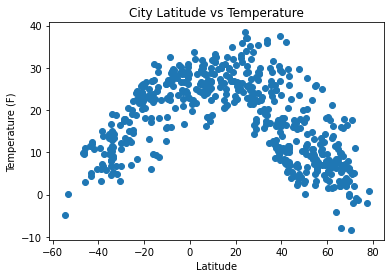

In [10]:
x_values = city_data['Latitude'] 
y_values = city_data['Temperature'] 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs Temperature')
plt.show()

## Latitude vs. Humidity Plot

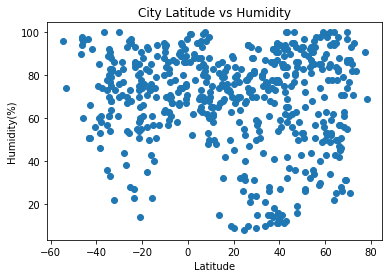

In [11]:
x_values = city_data['Latitude'] 
y_values = city_data['Humidity'] 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

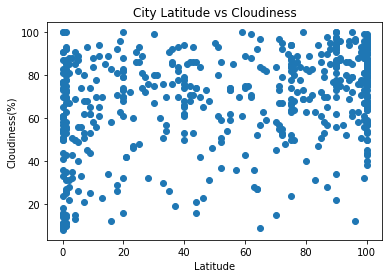

In [12]:
x_values = city_data['Cloudiness'] 
y_values = city_data['Humidity'] 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

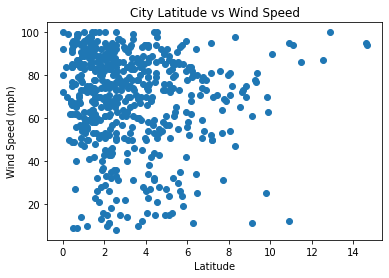

In [13]:
x_values = city_data['Wind Speed'] 
y_values = city_data['Humidity'] 
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.show()

## Linear Regression

In [14]:
north_city_data = city_data[city_data['Latitude'] > 0]
south_city_data = city_data[city_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

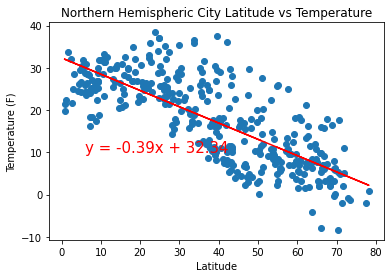

In [15]:
x_values = north_city_data['Latitude'] 
y_values = north_city_data['Temperature'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemispheric City Latitude vs Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

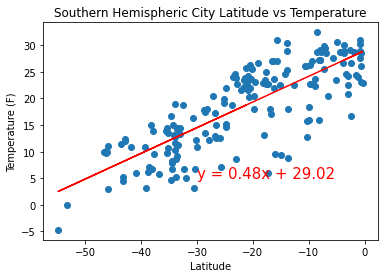

In [16]:
x_values = south_city_data ['Latitude'] 
y_values = south_city_data ['Temperature'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemispheric City Latitude vs Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

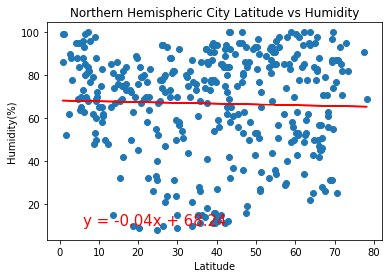

In [17]:
x_values = north_city_data['Latitude'] 
y_values = north_city_data['Humidity'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Northern Hemispheric City Latitude vs Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

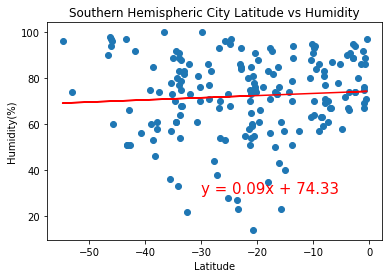

In [18]:
x_values = south_city_data['Latitude'] 
y_values = south_city_data['Humidity'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Southern Hemispheric City Latitude vs Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

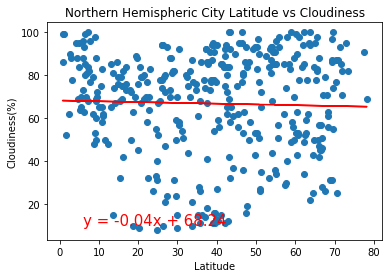

In [19]:
x_values = north_city_data['Latitude'] 
y_values = north_city_data['Humidity'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Northern Hemispheric City Latitude vs Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

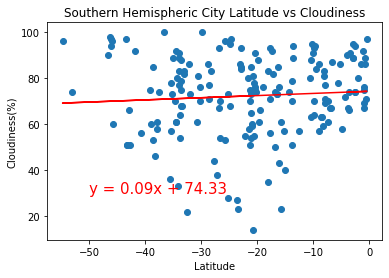

In [20]:
x_values = south_city_data['Latitude'] 
y_values = south_city_data['Humidity'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Southern Hemispheric City Latitude vs Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

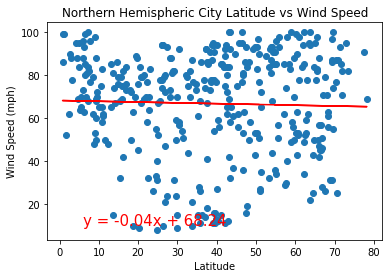

In [21]:
x_values = north_city_data['Latitude'] 
y_values = north_city_data['Humidity'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemispheric City Latitude vs Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

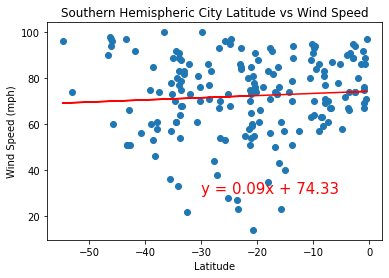

In [22]:
x_values = south_city_data['Latitude'] 
y_values = south_city_data['Humidity'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemispheric City Latitude vs Wind Speed')
plt.show()